# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
weather_json = []

for city in cities:

    query_url = url + "appid=" + weather_api_key + "&q=" + city

    # Get weather data
    weather_response = requests.get(query_url)
    local_json = weather_response.json()

    # Get the temperature from the response
    if (local_json['cod'] == '404'):
        print("city not found")
    else:
        print ("Process Record " + str(local_json['id']) + "|" + local_json['name'])
        weather_json.append(local_json)
        


Process Record 2155415|New Norfolk
Process Record 6165406|Thompson
Process Record 2075265|Busselton
Process Record 3453503|Pires do Rio
Process Record 2171099|Codrington
Process Record 4030556|Rikitea
city not found
Process Record 2090021|Namatanai
Process Record 934322|Mahébourg
Process Record 1514792|Gazojak
Process Record 6255012|Flinders
Process Record 1282256|Hithadhoo
Process Record 3904906|Santa Cruz de la Sierra
Process Record 3874787|Punta Arenas
Process Record 6949678|Taitung City
Process Record 1244926|Hambantota
Process Record 3471451|Arraial do Cabo
city not found
Process Record 1485020|Znamenskoye
Process Record 1635283|Metro
Process Record 2313084|Mangai
Process Record 542464|Krasnoarmeysk
Process Record 1507390|Dikson
Process Record 964432|Port Alfred
Process Record 2123628|Magadan
Process Record 1651810|Airai
Process Record 5880054|Barrow
Process Record 4020109|Atuona
Process Record 3832899|Viedma
Process Record 3573374|The Valley
Process Record 1516048|Khovd
Process R

city not found
Process Record 535839|Leshukonskoye
Process Record 2871538|Mettlach
Process Record 5866063|Kenai
Process Record 149812|Sokoni
Process Record 5380437|Pacific Grove
Process Record 1488920|Turochak
Process Record 3901485|Viloco
Process Record 5969025|Haines Junction
Process Record 3939168|Huarmey
Process Record 2177069|Ballina
Process Record 5557293|Sitka
Process Record 3533462|Acapulco de Juárez
Process Record 464179|Zavetnoye
Process Record 2214827|Mizdah
Process Record 2033536|Yakeshi
Process Record 1513491|Yangi Marg`ilon
Process Record 1267283|Kendrapara
Process Record 2641598|Newport
city not found
city not found
Process Record 2178753|Kirakira
Process Record 1217662|Romitan
Process Record 1502041|Krasnoyarka
Process Record 2507480|Algiers
Process Record 3628473|San Cristobal
city not found
Process Record 3412093|Vestmannaeyjar
Process Record 6113406|Prince Rupert
Process Record 1510689|Baykit
city not found
Process Record 3430863|Mar del Plata
Process Record 2014836|

Process Record 5983720|Iqaluit
Process Record 1608451|Nan
Process Record 4676740|Brownsville
Process Record 1214026|Sabang
Process Record 2120047|Ust'-Omchug
Process Record 1261960|Nandigāma
Process Record 2253354|Dakar
Process Record 2214432|Nālūt
Process Record 1052944|Angoche
Process Record 3451205|Rio das Ostras
Process Record 4566022|Loíza
Process Record 2067119|Mandurah
Process Record 5884588|Amos
Process Record 493702|Mikhaylovsk
Process Record 5972762|Hay River
Process Record 310855|Kâhta
Process Record 3468560|Caçapava do Sul
Process Record 523443|Narimanov
Process Record 359796|Suez
Process Record 4996248|Holland
Process Record 3685702|Cravo Norte
Process Record 1633034|Palu
city not found
Process Record 4034496|Fare
Process Record 4228452|Villa Rica
Process Record 2027296|Aykhal
Process Record 3421319|Nuuk
Process Record 5492450|South Valley
Process Record 3393091|Paraipaba
Process Record 2138592|Pouembout
Process Record 3489657|Lucea
Process Record 1525988|Ayagoz
Process Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
dframe = pd.DataFrame.from_records(weather_json)




# Clean up nested jsons
lat_lon_df = pd.DataFrame.from_records(dframe['coord'])
weather_df = pd.DataFrame.from_records(pd.DataFrame.from_records(dframe['weather'])[0])
main_df = pd.DataFrame.from_records(dframe['main'])
wind_df = pd.DataFrame.from_records(dframe['wind'])
clouds_df = pd.DataFrame.from_records(dframe['clouds'])
sys_df = pd.DataFrame.from_records(dframe['sys'])

clean_df = pd.DataFrame({"City": dframe['name'],
                         "Lat" : lat_lon_df['lat'], 
                         "Lng" : lat_lon_df['lon'],
                         "Max Temp" : ((main_df['temp_max'] - 273.15)*(9/5)+32),
                         "Humidity" : main_df['humidity'],
                         "Cloudiness" : clouds_df['all'],
                         "Wind Speed" : wind_df['speed'],
                         "Country" : sys_df['country'],
                         "Date" : dframe['dt']
                        })

clean_df.to_csv("city.csv")

clean_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.78,147.06,60.998,61,0,1.38,AU,1607891116
1,Thompson,55.74,-97.86,-11.200,69,40,5.70,CA,1607891116
2,Busselton,-33.65,115.33,48.002,97,5,3.54,AU,1607891116
3,Pires do Rio,-17.30,-48.28,83.300,58,84,3.05,BR,1607891116
4,Codrington,-38.27,141.97,67.604,42,7,4.72,AU,1607891116


In [25]:
lat_dat = [len(clean_df['Lat']),clean_df['Lat'].mean(),clean_df['Lat'].std(),clean_df['Lat'].min(),clean_df['Lat'].quantile(0.25),clean_df['Lat'].quantile(0.5),clean_df['Lat'].quantile(0.75),clean_df['Lat'].max()]
lng_dat = [len(clean_df['Lng']),clean_df['Lng'].mean(),clean_df['Lng'].std(),clean_df['Lng'].min(),clean_df['Lng'].quantile(0.25),clean_df['Lng'].quantile(0.5),clean_df['Lng'].quantile(0.75),clean_df['Lng'].max()]
max_dat = [len(clean_df['Max Temp']),clean_df['Max Temp'].mean(),clean_df['Max Temp'].std(),clean_df['Max Temp'].min(),clean_df['Max Temp'].quantile(0.25),clean_df['Max Temp'].quantile(0.5),clean_df['Max Temp'].quantile(0.75),clean_df['Max Temp'].max()]
hum_dat = [len(clean_df['Humidity']),clean_df['Humidity'].mean(),clean_df['Humidity'].std(),clean_df['Humidity'].min(),clean_df['Humidity'].quantile(0.25),clean_df['Humidity'].quantile(0.5),clean_df['Humidity'].quantile(0.75),clean_df['Humidity'].max()]
cloud_dat = [len(clean_df['Cloudiness']),clean_df['Cloudiness'].mean(),clean_df['Cloudiness'].std(),clean_df['Cloudiness'].min(),clean_df['Cloudiness'].quantile(0.25),clean_df['Cloudiness'].quantile(0.5),clean_df['Cloudiness'].quantile(0.75),clean_df['Cloudiness'].max()]
wind_dat = [len(clean_df['Wind Speed']),clean_df['Wind Speed'].mean(),clean_df['Wind Speed'].std(),clean_df['Wind Speed'].min(),clean_df['Wind Speed'].quantile(0.25),clean_df['Wind Speed'].quantile(0.5),clean_df['Wind Speed'].quantile(0.75),clean_df['Wind Speed'].max()]
date_dat = [len(clean_df['Date']),clean_df['Date'].mean(),clean_df['Date'].std(),clean_df['Date'].min(),clean_df['Date'].quantile(0.25),clean_df['Date'].quantile(0.5),clean_df['Date'].quantile(0.75),clean_df['Date'].max()]

pd.DataFrame({"Lat" : lat_dat, 
              "Lng" : lng_dat,
               "Max Temp" : max_dat,
               "Humidity" : hum_dat,
               "Cloudiness" : cloud_dat,
               "Wind Speed" : wind_dat,
               "Date" : date_dat
             },
            index = ['count','mean','std','min','25%','50%','75%','max'])

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,5.900000e+02
mean,20.038017,16.120661,50.112912,74.661017,57.142373,3.867322,1.607891e+09
std,33.500786,90.542463,32.758421,18.753164,39.266968,2.869507,8.580784e+01
min,-54.800000,-175.200000,-49.306000,1.000000,0.000000,0.010000,1.607891e+09
25%,-7.707500,-65.867500,30.200000,66.000000,20.000000,1.790000,1.607891e+09
50%,23.845000,22.540000,60.800000,78.000000,75.000000,3.100000,1.607891e+09
75%,48.962500,95.530000,76.950500,88.000000,95.000000,5.100000,1.607891e+09
max,78.220000,178.420000,92.030000,100.000000,100.000000,20.100000,1.607891e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [75]:
#  Get the indices of cities that have humidity over 100%.


In [76]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

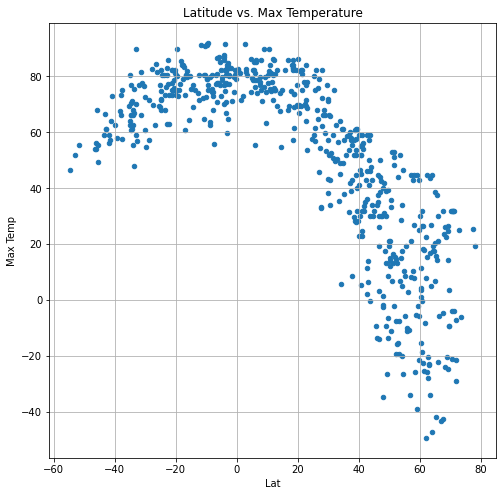

In [26]:
clean_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8),
              title="Latitude vs. Max Temperature")
plt.show()


## Latitude vs. Humidity Plot

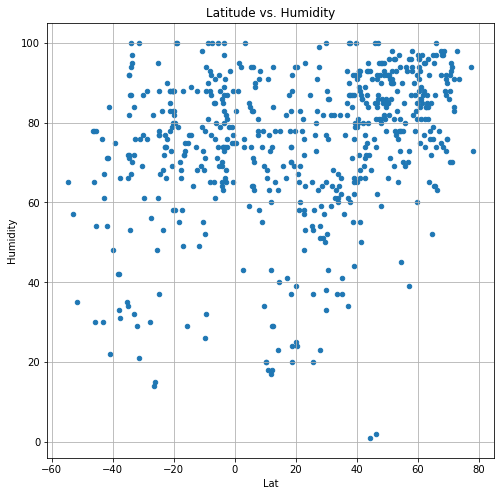

In [27]:
clean_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8),
              title="Latitude vs. Humidity")
plt.show()


## Latitude vs. Cloudiness Plot

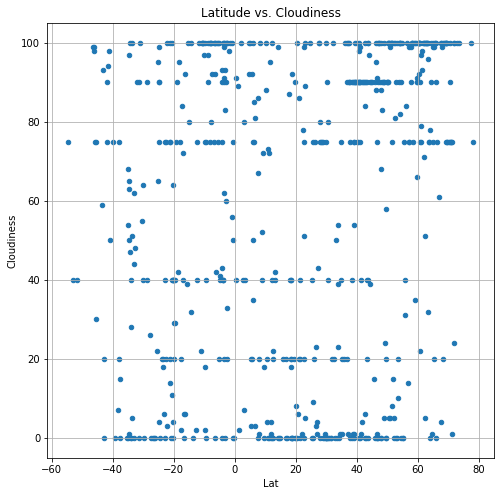

In [28]:
clean_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8),
              title="Latitude vs. Cloudiness")
plt.show()


## Latitude vs. Wind Speed Plot

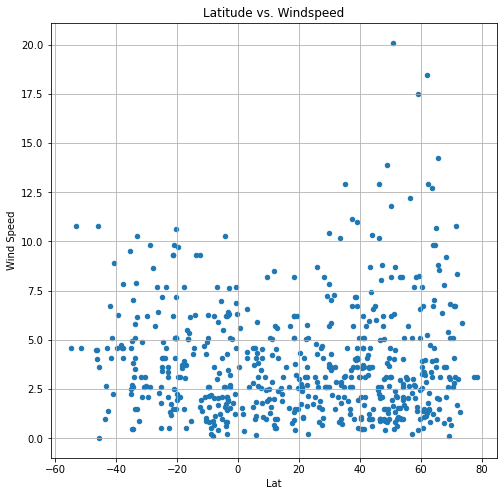

In [29]:
clean_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8),
              title="Latitude vs. Windspeed")
plt.show()


## Linear Regression

In [13]:
north_df = clean_df[clean_df['Lat']>=0.0]
south_df = clean_df[clean_df['Lat']<0.0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

1      63.575449
8      47.371158
13     25.352788
14     22.210965
16     54.346345
         ...    
584    19.444795
585    25.694290
586    22.808595
588    44.032972
589    43.085302
Name: Max Temp, Length: 393, dtype: float64
y = -0.85x +276.29
The r-value is: 0.6685770268584367


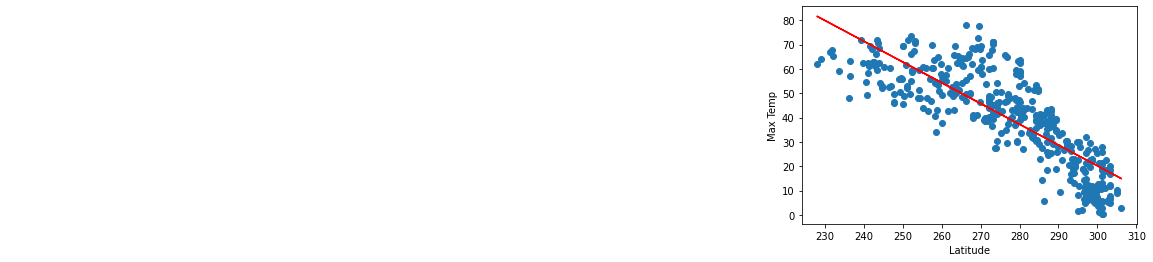

In [30]:
# Add the linear regression equation and line to plot
x_values = north_df['Max Temp']
y_values = north_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

#Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

0     -31.048523
2     -42.401369
3     -11.566283
4     -25.277754
5     -17.824500
         ...    
568   -10.355522
570   -10.009591
571   -29.649072
578   -18.642157
587    -4.977858
Name: Max Temp, Length: 197, dtype: float64
y = 1.57x +-485.89
The r-value is: 0.3846795474960675


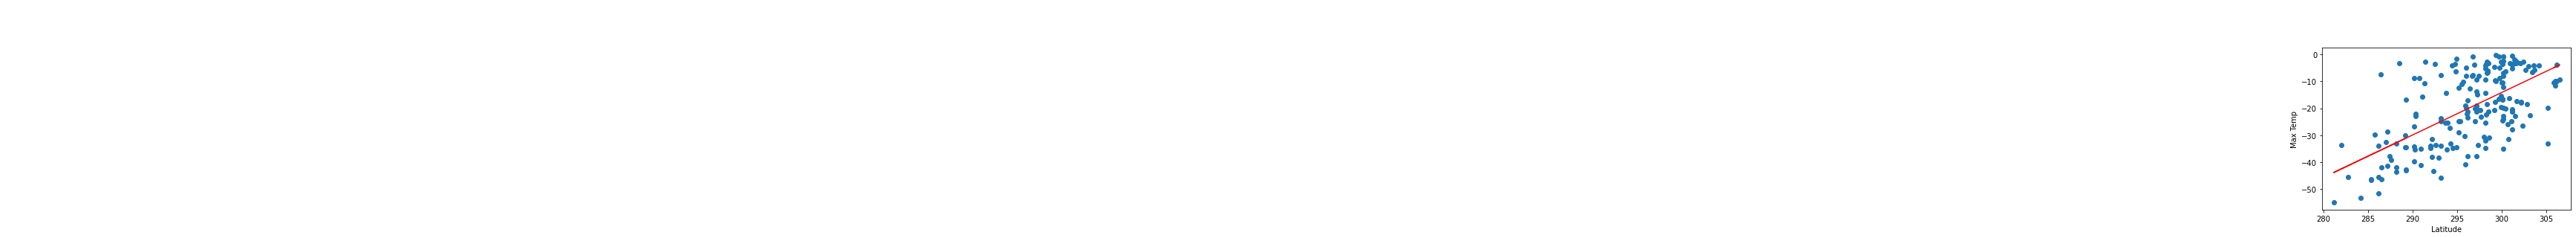

In [31]:
# Add the linear regression equation and line to plot
x_values = south_df['Max Temp']
y_values = south_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

#Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

1      37.362004
8      44.850503
13     40.120924
14     42.879845
16     48.003555
         ...    
584    36.967872
585    31.055899
586    40.515056
588    46.427029
589    41.303319
Name: Humidity, Length: 393, dtype: float64
y = 0.39x +10.17
The r-value is: 0.14210045791197226


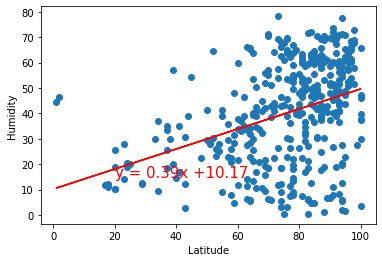

In [32]:
# Add the linear regression equation and line to plot
x_values = north_df['Humidity']
y_values = north_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

#Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0     -22.607911
2     -14.084321
3     -23.318210
4     -27.106472
5     -20.003480
         ...    
568   -20.950546
570   -19.529948
571   -25.685874
578   -16.215218
587   -24.028509
Name: Humidity, Length: 197, dtype: float64
y = 0.24x +-37.05
The r-value is: 0.10345602492177255


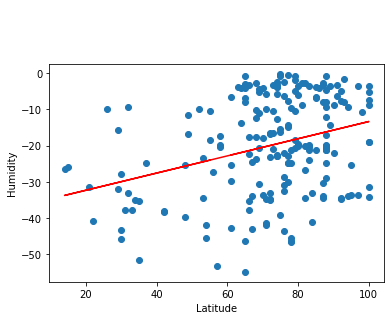

In [33]:
# Add the linear regression equation and line to plot
x_values = south_df['Humidity']
y_values = south_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

#Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

1      37.042937
8      30.302512
13     38.896554
14     47.153575
16     46.985065
         ...    
584    30.976554
585    45.299958
586    42.435277
588    30.302512
589    45.468469
Name: Cloudiness, Length: 393, dtype: float64
y = 0.17x +30.3
The r-value is: 0.11970488521401057


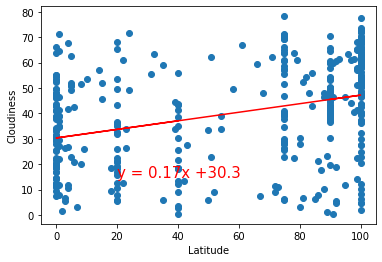

In [34]:
# Add the linear regression equation and line to plot
x_values = north_df['Cloudiness']
y_values = north_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

#Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0     -23.780034
2     -23.435438
3     -17.990827
4     -23.297600
5     -23.366519
         ...    
568   -19.644886
570   -16.888120
571   -18.611099
578   -21.023268
587   -16.888120
Name: Cloudiness, Length: 197, dtype: float64
y = 0.07x +-23.78
The r-value is: 0.0353203678716849


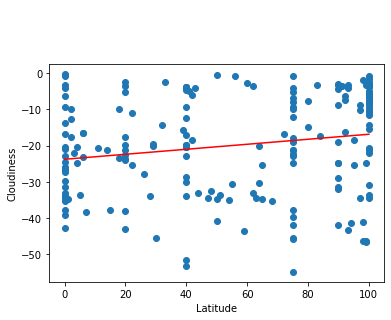

In [36]:
# Add the linear regression equation and line to plot
x_values = south_df['Cloudiness']
y_values = south_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

#Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

1      41.922238
8      38.039210
13     39.026913
14     42.144955
16     38.610529
         ...    
584    37.632509
585    38.474961
586    40.508467
588    37.371058
589    41.341236
Name: Wind Speed, Length: 393, dtype: float64
y = 0.97x +36.4
The r-value is: 0.02193486648144768


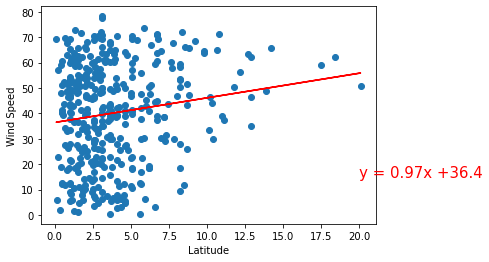

In [37]:
# Add the linear regression equation and line to plot
x_values = north_df['Wind Speed']
y_values = north_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

#Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0     -17.552183
2     -19.570409
3     -19.112571
4     -20.672959
5     -19.411567
         ...    
568   -22.149254
570   -22.784621
571   -20.560835
578   -21.028017
587   -17.094344
Name: Wind Speed, Length: 197, dtype: float64
y = -0.93x +-16.26
The r-value is: 0.03151881070636336


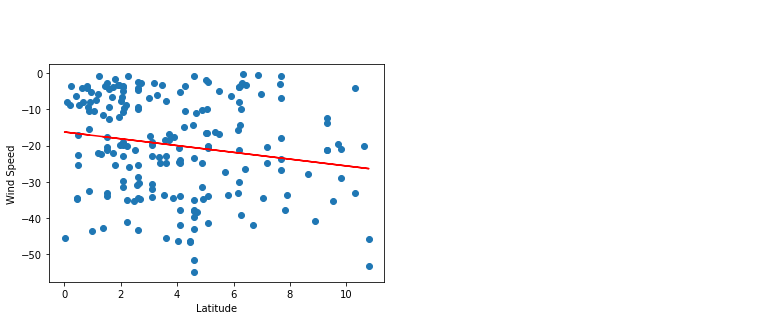

In [38]:
# Add the linear regression equation and line to plot
x_values = south_df['Wind Speed']
y_values = south_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

#Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()